In [18]:
import pandas as pd
import yfinance as yf
import math
import pandas_ta as ta
import matplotlib.pyplot as plt
from termcolor import colored as cl

Get historical data from yFinance

In [14]:

def get_historical_data(symbol, start_date, interval):
    stock_data = yf.download(symbol, start=start_date, interval= '1wk')
    return stock_data

aapl = get_historical_data('AAPL', '1993-01-01', '1wk')
aapl.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-15,197.529999,198.399994,193.500000,194.679993,194.679993,323448000
2023-12-22,195.179993,195.410004,191.089996,193.580002,193.580002,148179700
2023-12-29,193.899994,194.399994,180.880005,181.910004,181.910004,255515600
2024-01-05,181.990005,187.050003,180.169998,185.589996,185.589996,260210900
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700


In [15]:

aapl[['dcl', 'dcm', 'dcu']] = aapl.ta.donchian(lower_length = 40, upper_length = 50)
aapl.index = pd.to_datetime(aapl.index)

aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,dcl,dcm,dcu
Date,,,,,,,,,
2023-12-15,197.529999,198.399994,193.500000,194.679993,194.679993,323448000,154.149994,176.884995,199.619995
2023-12-22,195.179993,195.410004,191.089996,193.580002,193.580002,148179700,155.979996,177.799995,199.619995
2023-12-29,193.899994,194.399994,180.880005,181.910004,181.910004,255515600,159.779999,179.699997,199.619995
2024-01-05,181.990005,187.050003,180.169998,185.589996,185.589996,260210900,159.779999,179.699997,199.619995
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,162.800003,181.209999,199.619995


Text(0, 0.5, 'Close')

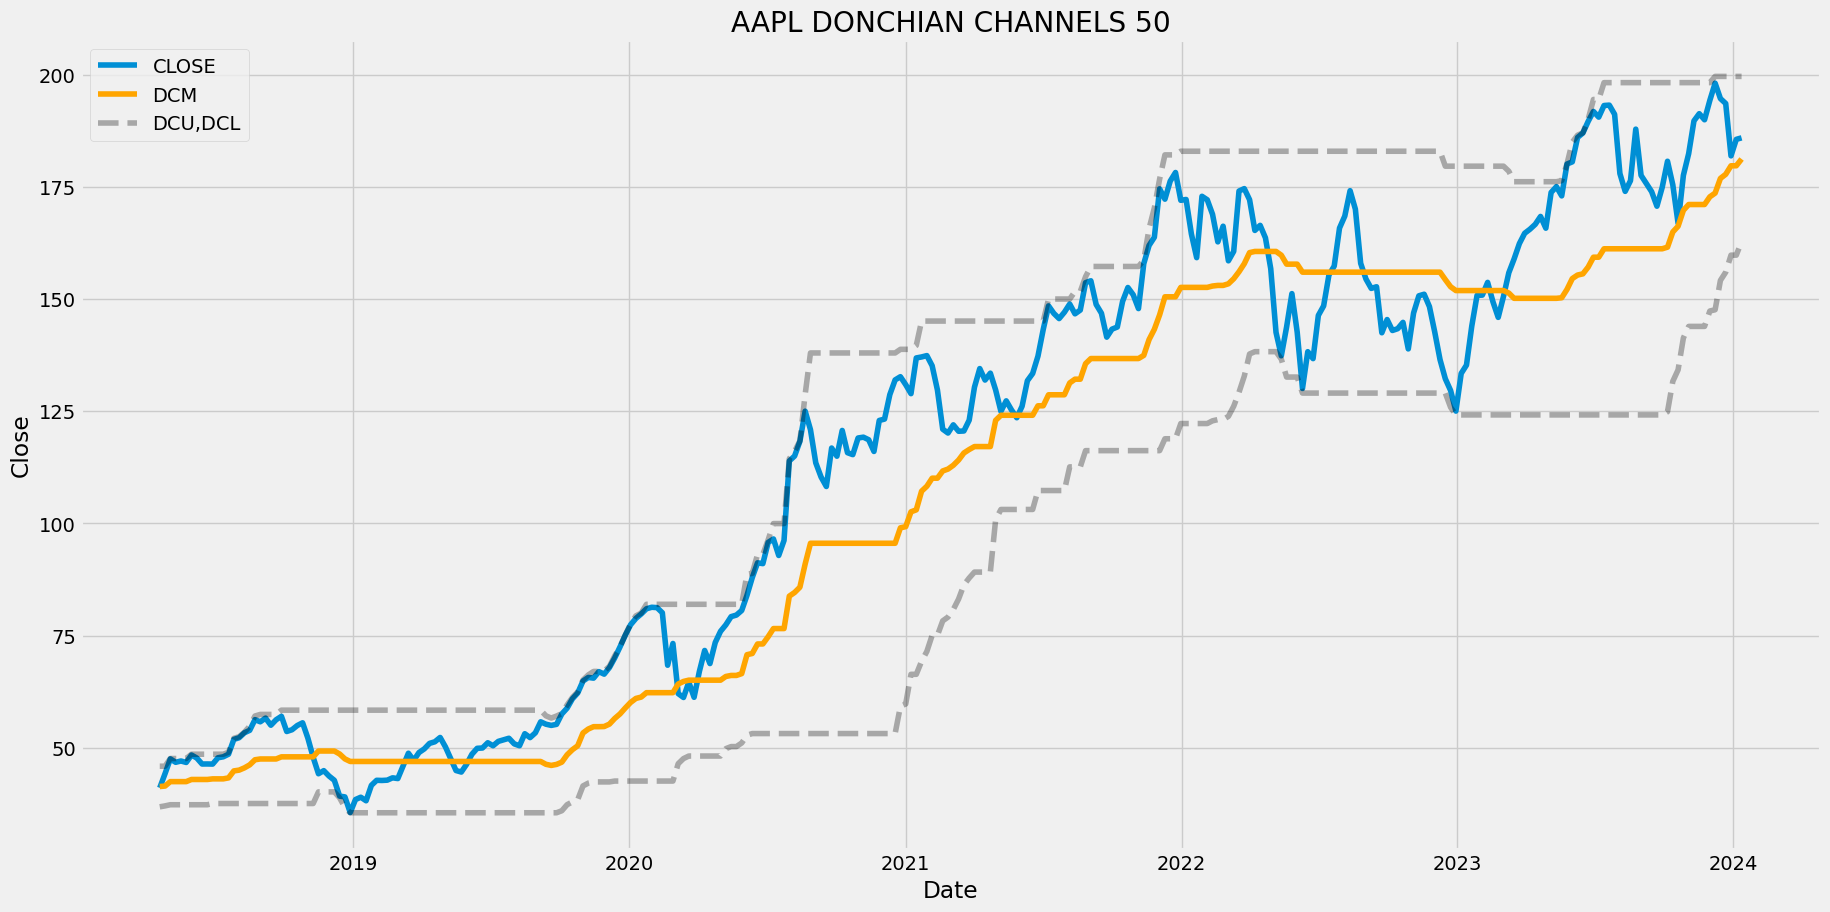

In [16]:
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')
plt.plot(aapl[-300:].Close, label = 'CLOSE')
plt.plot(aapl[-300:].dcl, color = 'black', linestyle = '--', alpha = 0.3)
plt.plot(aapl[-300:].dcm, color = 'orange', label = 'DCM')
plt.plot(aapl[-300:].dcu, color = 'black', linestyle = '--', alpha = 0.3, label = 'DCU,DCL')
plt.legend()
plt.title('AAPL DONCHIAN CHANNELS 50')
plt.xlabel('Date')
plt.ylabel('Close')

In [19]:
def implement_strategy(aapl, investment):
    in_position = False
    equity = investment

    for i in range(3, len(aapl)):
       
        if aapl['High'].iloc[i] == aapl['dcu'].iloc[i] and in_position == False:
            no_of_shares = math.floor(equity / aapl['Close'].iloc[i])
            equity -= (no_of_shares * aapl['Close'].iloc[i])
            in_position = True
            print(cl('BUY: ', color='green', attrs=['bold']), f'{no_of_shares} Shares are bought at ${aapl["Close"].iloc[i]} on {aapl.index[i].strftime("%Y-%m-%d")}')  
        elif aapl['Low'].iloc[i] == aapl['dcu'].iloc[i] and in_position == True:
            equity += (no_of_shares * aapl['Close'].iloc[i])
            in_position = False
            print(cl('SELL: ', color='red', attrs=['bold']), f'{no_of_shares} Shares are bought at ${aapl["Close"].iloc[i]} on {aapl.index[i].strftime("%Y-%m-%d")}')

    if in_position:
        equity += (no_of_shares * aapl['Close'].iloc[i])
        print(cl(f'\nClosing position at {aapl["Close"].iloc[i]} on {aapl.index[i].strftime("%Y-%m-%d")}', attrs=['bold']))
        in_position = False

    earning = round(equity - investment, 2)
    roi = round(equity / investment * 100, 2)
    print(cl(f'EARNING: ${earning} ; ROI: {roi}%', attrs=['bold']))

implement_strategy(aapl, 100000)


BUY:  272340 Shares are bought at $0.3671880066394806 on 1994-10-07

Closing position at 185.9199981689453 on 2024-01-12
EARNING: $50533452.32 ; ROI: 50633.45%


In [20]:
spy = get_historical_data('SPY', '1993-01-01', '1W')
spy_ret = round(((spy['Close'].iloc[-1] - spy['Close'].iloc[0])/spy['Close'].iloc[0])*100)

print(cl('SPY ETF buy/hold return:', attrs = ['bold']), f'{spy_ret}%')

[*********************100%%**********************]  1 of 1 completed

SPY ETF buy/hold return: 985%
